In [1]:
# 기본 라이브러리

# 분석을 위한 라이브러리
import numpy as np
import pandas as pd

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import os

# 에러메세지 안나오게
import warnings
warnings.filterwarnings('ignore')

# pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

#워드클라우드
from wordcloud import WordCloud 
from PIL import *

In [2]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

In [3]:
# 디비 연결
def rds_python_conn():
    import psycopg2
    import json
    from sqlalchemy import create_engine
    # rds와 python 연동을 위한 정보 입력
    with open('postgres.info.json','r') as json_file:
        db_info = json.load(json_file)

    host = "postgres.c4brhfvhrm5g.ap-northeast-2.rds.amazonaws.com"
    dbname = 'postgres' 
    user = 'postgres' 
    password = "postgres123"
    port = 5432

    connection = psycopg2.connect(host=host,
                                  dbname=dbname ,
                                  user=user ,
                                  password=password ,
                                  port=port)
    return connection

def sql(SQL):
    connection = rds_python_conn()
    cur = connection.cursor()

    cur.execute(SQL)
    rows = cur.fetchall()
    return rows


In [19]:
SQL = """
SELECT product_id 제품ID,product_category_name 제품이름,product_name_length 제품이름길이,product_description_length 제품설명길이,product_photos_qty 제품사진수,product_weight_g 제품무게,product_length_cm 제품길이,
        product_height_cm 제품높이,product_width_cm 제품높이
FROM products;
"""

products = pd.read_sql(SQL, rds_python_conn())
products

,제품id,제품이름,제품이름길이,제품설명길이,제품사진수,제품무게,제품길이,제품높이,제품높이
0,16234,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,6621,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,22240,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,18578,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,14617,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,28216,furniture_decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,20353,construction_tools_lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,3826,bed_bath_table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,29140,computers_accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [20]:
SQL = """
SELECT order_id 주문ID ,order_item_id 주문아이템ID ,product_id 제품ID, price+freight_value as 가격
FROM order_items;
"""

items = pd.read_sql(SQL, rds_python_conn())
items

,주문id,주문아이템id,제품id,가격
0,96870,1,12130,72.19
1,9433,1,29611,259.83
2,87326,1,23255,216.87
3,91182,1,1404,25.78
4,79789,1,30255,218.04
...,...,...,...,...
112645,59834,1,32313,343.40
112646,72009,1,25525,386.53
112647,56253,1,159,116.85
112648,89718,1,11543,64.71


In [25]:
df = items.merge(products, on='제품id', how='left')
df

# 가설 : 제품설명길이가 길수록 매출이 높다.

,주문id,주문아이템id,제품id,가격,제품이름,제품이름길이,제품설명길이,제품사진수,제품무게,제품길이,제품높이,제품높이
0,96870,1,12130,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,9433,1,29611,259.83,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,87326,1,23255,216.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,91182,1,1404,25.78,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,79789,1,30255,218.04,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
112645,59834,1,32313,343.40,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,72009,1,25525,386.53,computers_accessories,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,56253,1,159,116.85,sports_leisure,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,89718,1,11543,64.71,computers_accessories,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [34]:
df.제품사진수.value_counts()

제품사진수
1.0     56028
2.0     21963
3.0     12392
4.0      8437
5.0      5368
6.0      3786
7.0      1501
8.0       727
10.0      342
9.0       313
11.0       71
12.0       53
13.0       30
15.0       12
17.0       11
14.0        6
18.0        4
19.0        2
20.0        1
Name: count, dtype: int64

In [53]:
list(df[df.제품사진수==1].groupby('제품이름')['가격'].mean())

[352.5299056603773,
 180.8431506849315,
 105.61549382716049,
 59.89333333333334,
 165.68283018867925,
 158.61310520361988,
 112.09580671580673,
 108.42893100097182,
 100.45466334164588,
 92.06122448979592,
 89.0406719367589,
 66.24897727272727,
 83.975,
 689.185,
 139.322160710597,
 139.81164305949008,
 173.92643442622952,
 203.8773544973545,
 287.2927027027027,
 180.0804618376276,
 131.89255319148936,
 228.2044,
 58.09315789473684,
 84.76078048780488,
 101.68862745098039,
 49.52978272390037,
 99.666,
 104.31071283095723,
 50.21666666666667,
 81.88274509803921,
 52.545,
 150.81599999999997,
 63.79245901639344,
 157.30787234042555,
 46.86533333333333,
 69.45136363636364,
 72.71840206185567,
 147.5726,
 106.73886876640421,
 218.3496629213483,
 143.54964285714286,
 181.1001226993865,
 133.07214764030613,
 121.834091954023,
 660.6280555555555,
 32.168965517241375,
 112.41641891891892,
 185.15990099009903,
 93.31161669242658,
 273.4290277777778,
 224.07666666666668,
 150.91076923076923,
 13

In [55]:
from scipy.stats import levene

group1_sales = list(df[df.제품사진수==1].groupby('제품이름')['가격'].mean())  # 사진 수가 1인 그룹의 매출 데이터
group2_sales = list(df[df.제품사진수>1].groupby('제품이름')['가격'].mean())  # 사진 수가 1개 이상인 그룹의 매출 데이터

# Levene's test 수행
statistic, p_value = levene(group1_sales, group2_sales)

# 결과 출력
print("Levene's test statistic:", statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("두 그룹의 분산이 통계적으로 유의미하게 다릅니다. 등분산 가정이 만족되지 않을 수 있습니다.")
else:
    print("두 그룹의 분산이 통계적으로 유의미하게 다르지 않습니다. 등분산 가정을 만족할 수 있습니다.")


Levene's test statistic: 0.6858910650545844
p-value: 0.4089852348743198
두 그룹의 분산이 통계적으로 유의미하게 다르지 않습니다. 등분산 가정을 만족할 수 있습니다.


In [59]:
# 실제로 이 평균값이 유의미한가를 t-test를 통해 확인

# 가설설정
# 귀무가설 : 평균은 차이가 없다.
# 대립가설 : 평균은 차이가 있다.

from scipy import stats

group1_sales = list(df[df.제품사진수==1].groupby('제품이름')['가격'].mean()) # 사진 수가 1인 그룹의 매출 데이터
group2_sales = list(df[df.제품사진수>1].groupby('제품이름')['가격'].mean())   # 사진 수가 1개 이상인 그룹의 매출 데이터

# 등분산 가정을 확인하고 독립표본 T-test 수행
statistic, p_value = stats.ttest_ind(group1_sales, group2_sales, equal_var=True)  # equal_var=False: 등분산 가정이 만족되지 않을 경우 Welch's t-test 사용

# 결과 출력
print("T-statistic:", statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("귀무 가설을 기각하고 대립 가설을 채택합니다.")
else:
    print("귀무 가설을 채택합니다.")

T-statistic: -1.287628992637242
p-value: 0.20001484774986658
귀무 가설을 채택합니다.


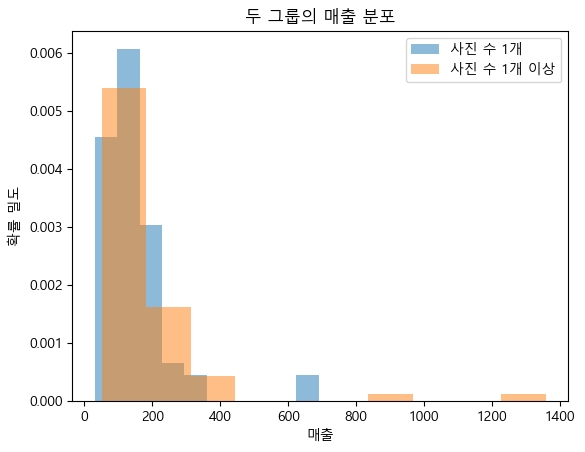

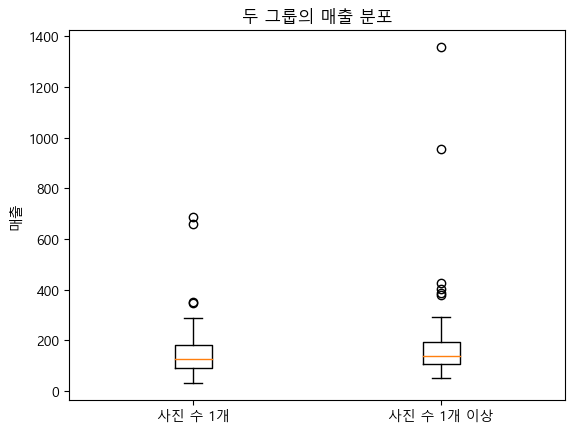

In [60]:
plt.hist(group1_sales, alpha=0.5, label='사진 수 1개', density=True)
plt.hist(group2_sales, alpha=0.5, label='사진 수 1개 이상', density=True)
plt.xlabel('매출')
plt.ylabel('확률 밀도')
plt.title('두 그룹의 매출 분포')
plt.legend()
plt.show()

# 상자 그림 (Box Plot)
plt.boxplot([group1_sales, group2_sales], labels=['사진 수 1개', '사진 수 1개 이상'])
plt.ylabel('매출')
plt.title('두 그룹의 매출 분포')
plt.show()

In [61]:
df[df.제품설명길이<=603]

,주문id,주문아이템id,제품id,가격,제품이름,제품이름길이,제품설명길이,제품사진수,제품무게,제품길이,제품높이,제품높이
0,96870,1,12130,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,9433,1,29611,259.83,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
3,91182,1,1404,25.78,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,79789,1,30255,218.04,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
5,6229,1,29635,34.59,housewares,36.0,558.0,1.0,450.0,24.0,8.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
112630,67765,1,673,123.60,luggage_accessories,41.0,155.0,3.0,16050.0,60.0,40.0,40.0
112637,49559,1,20653,273.92,sports_leisure,32.0,280.0,2.0,2700.0,60.0,15.0,15.0
112638,55002,1,16390,15.86,musical_instruments,41.0,103.0,1.0,100.0,60.0,16.0,11.0
112646,72009,1,25525,386.53,computers_accessories,31.0,232.0,1.0,8950.0,45.0,26.0,38.0


In [62]:
df[df.제품설명길이>603]

,주문id,주문아이템id,제품id,가격,제품이름,제품이름길이,제품설명길이,제품사진수,제품무게,제품길이,제품높이,제품높이
2,87326,1,23255,216.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
6,96789,1,9435,31.75,telephony,52.0,815.0,1.0,200.0,27.0,5.0,20.0
7,72881,1,15354,880.75,garden_tools,39.0,1310.0,3.0,13805.0,35.0,75.0,45.0
9,15161,1,19855,65.39,books_technical,52.0,1192.0,1.0,850.0,29.0,3.0,21.0
10,52460,1,30801,68.87,health_beauty,57.0,614.0,1.0,950.0,35.0,25.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
112643,24522,4,15078,89.19,watches_gifts,41.0,1159.0,4.0,350.0,16.0,14.0,11.0
112644,45510,1,31403,139.88,home_construction,58.0,918.0,6.0,1050.0,16.0,20.0,16.0
112645,59834,1,32313,343.40,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112647,56253,1,159,116.85,sports_leisure,43.0,869.0,1.0,967.0,21.0,24.0,19.0


In [63]:
from scipy.stats import levene

group1_sales = list(df[df.제품설명길이<=603].groupby('제품이름')['가격'].mean())  # 사진 수가 1인 그룹의 매출 데이터
group2_sales = list(df[df.제품설명길이>603].groupby('제품이름')['가격'].mean())  # 사진 수가 1개 이상인 그룹의 매출 데이터

# Levene's test 수행
statistic, p_value = levene(group1_sales, group2_sales)

# 결과 출력
print("Levene's test statistic:", statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("두 그룹의 분산이 통계적으로 유의미하게 다릅니다. 등분산 가정이 만족되지 않을 수 있습니다.")
else:
    print("두 그룹의 분산이 통계적으로 유의미하게 다르지 않습니다. 등분산 가정을 만족할 수 있습니다.")


Levene's test statistic: 0.6714050662533737
p-value: 0.41399578577264895
두 그룹의 분산이 통계적으로 유의미하게 다르지 않습니다. 등분산 가정을 만족할 수 있습니다.


In [65]:
# 실제로 이 평균값이 유의미한가를 t-test를 통해 확인

# 가설설정
# 귀무가설 : 평균은 차이가 없다.
# 대립가설 : 평균은 차이가 있다.

from scipy import stats

group1_sales = list(df[df.제품설명길이<=603].groupby('제품이름')['가격'].mean())  # 사진 수가 1인 그룹의 매출 데이터
group2_sales = list(df[df.제품설명길이>603].groupby('제품이름')['가격'].mean())  # 사진 수가 1개 이상인 그룹의 매출 데이터

# 등분산 가정을 확인하고 독립표본 T-test 수행
statistic, p_value = stats.ttest_ind(group1_sales, group2_sales, equal_var=True)  # equal_var=False: 등분산 가정이 만족되지 않을 경우 Welch's t-test 사용

# 결과 출력
print("T-statistic:", statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("귀무 가설을 기각하고 대립 가설을 채택합니다.")
else:
    print("귀무 가설을 채택합니다.")

T-statistic: -1.911009844488918
p-value: 0.05810756728397581
귀무 가설을 채택합니다.


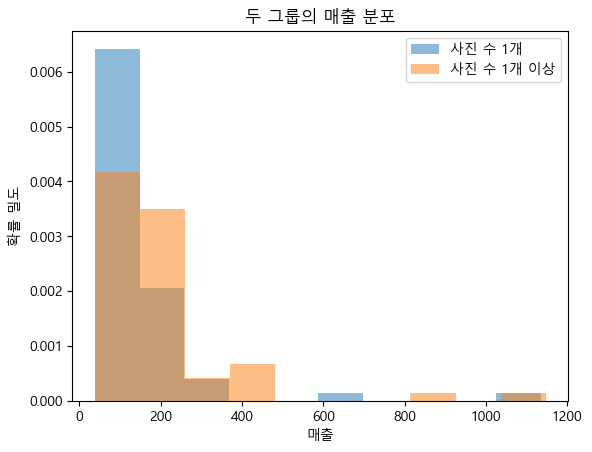

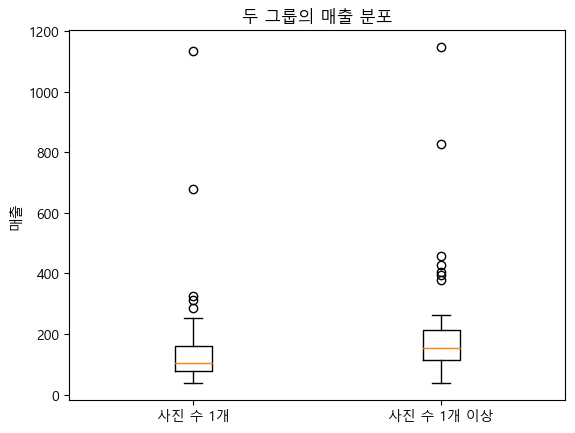

In [66]:
plt.hist(group1_sales, alpha=0.5, label='사진 수 1개', density=True)
plt.hist(group2_sales, alpha=0.5, label='사진 수 1개 이상', density=True)
plt.xlabel('매출')
plt.ylabel('확률 밀도')
plt.title('두 그룹의 매출 분포')
plt.legend()
plt.show()

# 상자 그림 (Box Plot)
plt.boxplot([group1_sales, group2_sales], labels=['사진 수 1개', '사진 수 1개 이상'])
plt.ylabel('매출')
plt.title('두 그룹의 매출 분포')
plt.show()